In [2]:
%matplotlib inline
from netCDF4 import Dataset
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from mpl_toolkits.basemap import Basemap

In [3]:
ABI = Dataset('/glade/scratch/gwallach/goes16_nc/ABI-L1b_conus/20190501/OR_ABI-L1b-RadC-M6C16_G16_s20191212326231_e20191212329016_c20191212329059.nc', 'r')
radiance = ABI.variables['Rad'][:]

In [4]:
#print(ABI)

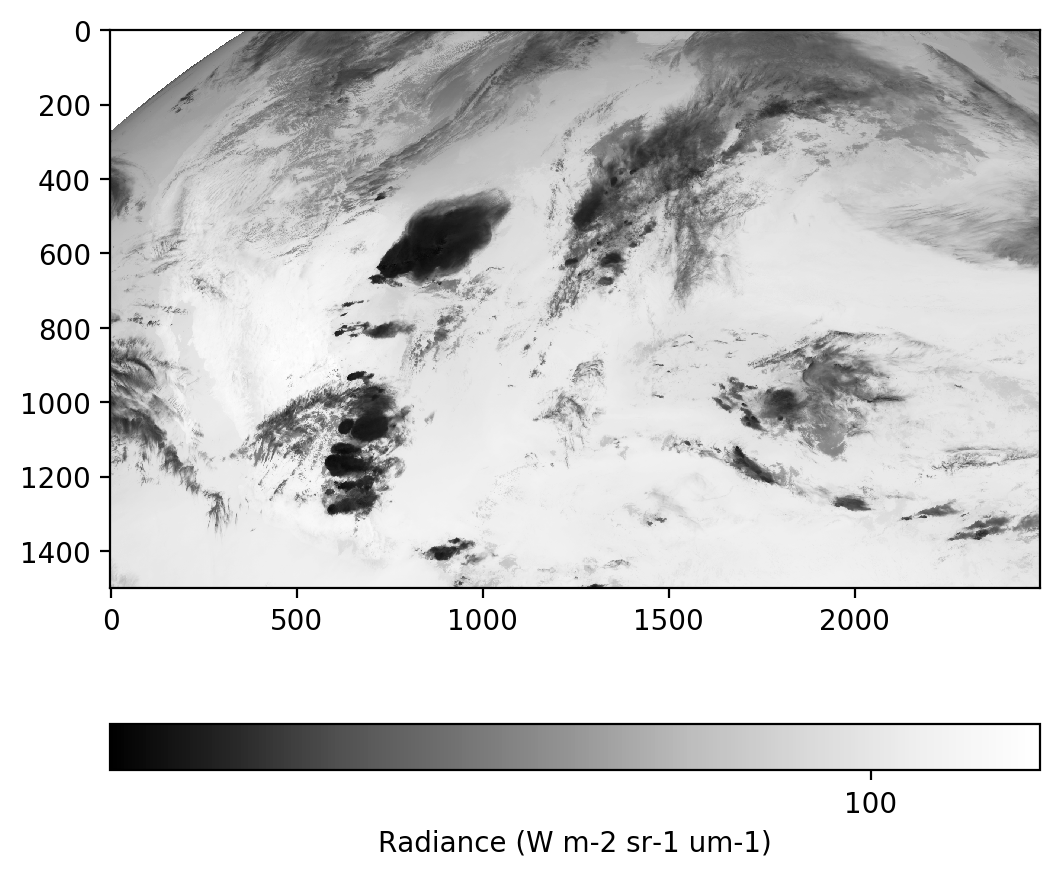

In [5]:
#plot radiance
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(radiance, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([1, 100, 200, 300, 400, 500, 600])
cb.set_label('Radiance (W m-2 sr-1 um-1)')
plt.show()

In [6]:
# Define some constants needed for the conversion. From the pdf linked above
Esun_Ch_01 = 726.721072
Esun_Ch_02 = 663.274497
Esun_Ch_03 = 441.868715
d2 = 0.3

In [7]:
# Apply the formula to convert radiance to reflectance
ref = (radiance * np.pi * d2) / Esun_Ch_02

# Make sure all data is in the valid data range
ref = np.maximum(ref, 0.0)
ref = np.minimum(ref, 1.0)

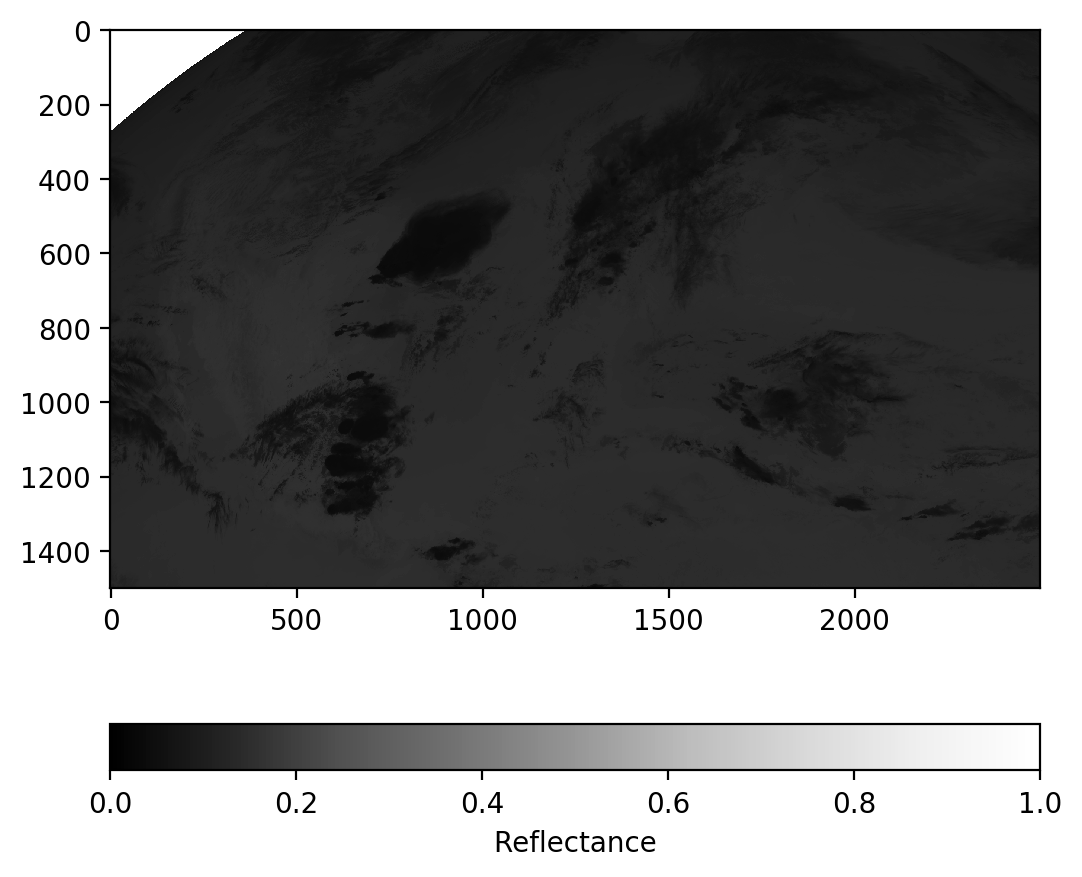

In [8]:
# Plot reflectance
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(ref, vmin=0.0, vmax=1.0, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Reflectance')
plt.show()

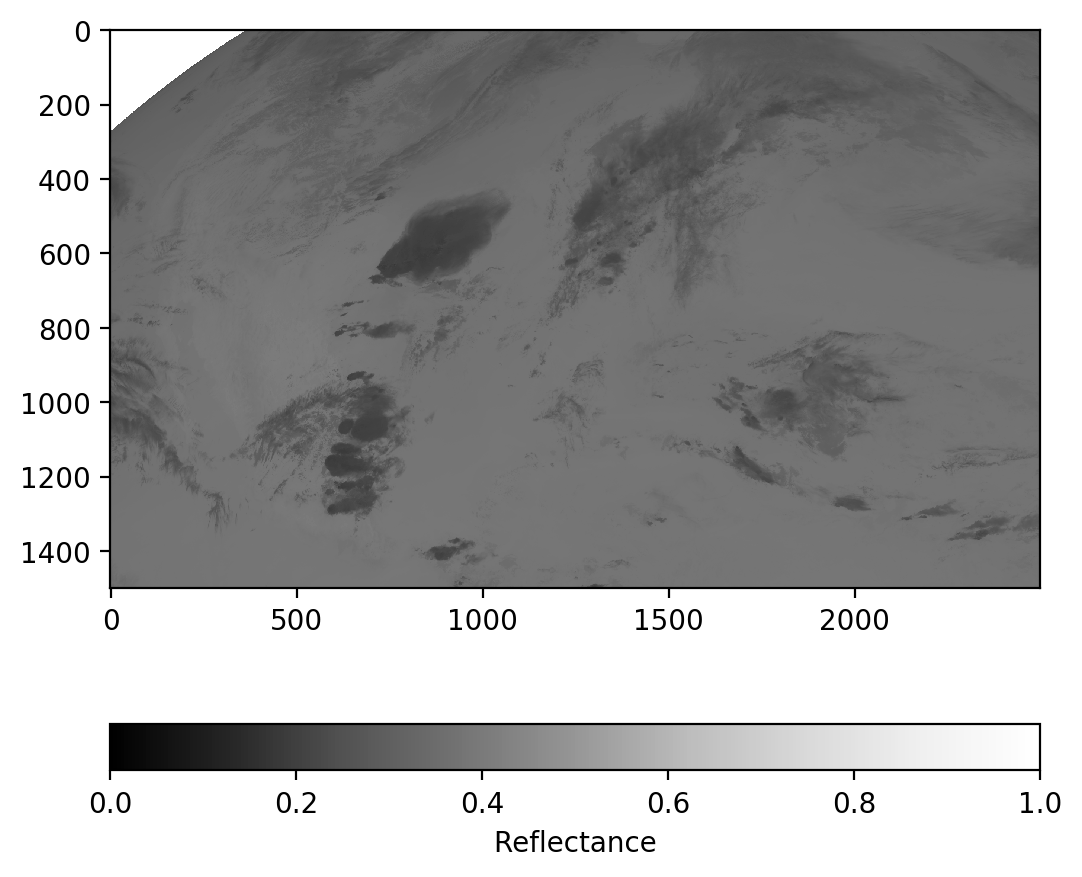

In [9]:
# Apply the formula to adjust reflectance gamma
ref_gamma = np.sqrt(ref)
# Plot gamma adjusted reflectance
fig = plt.figure(figsize=(6,6),dpi=200)
im = plt.imshow(ref_gamma, vmin=0.0, vmax=1.0, cmap='Greys_r')
cb = fig.colorbar(im, orientation='horizontal')
cb.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
cb.set_label('Reflectance')
plt.show()

In [10]:
g16glm= Dataset('/glade/scratch/gwallach/goes16_nc/GLM-L2_LCFA/20190501/OR_GLM-L2-LCFA_G16_s20191212301000_e20191212301200_c20191212301226.nc', 'r')

In [11]:
event_lat = g16glm.variables['event_lat'][:]
event_lon = g16glm.variables['event_lon'][:]

group_lat = g16glm.variables['group_lat'][:]
group_lon = g16glm.variables['group_lon'][:]

flash_lat = g16glm.variables['flash_lat'][:]
flash_lon = g16glm.variables['flash_lon'][:]

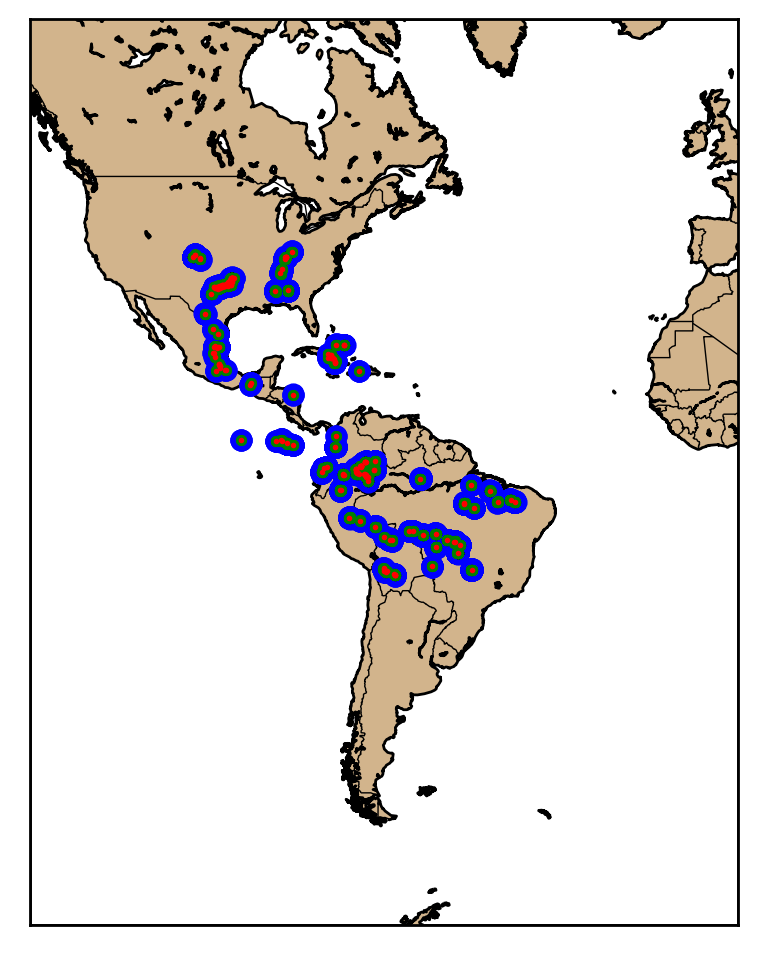

No handles with labels found to put in legend.


RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

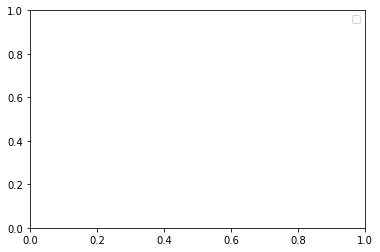

In [12]:
fig = plt.figure(figsize=(6,6),dpi=200)
map = Basemap(projection='merc', lat_0 = 0, lon_0 = -70.0,
    resolution = 'l', area_thresh = 1000.0,
    llcrnrlon=-135.0, llcrnrlat=-65.0,
    urcrnrlon=0.0, urcrnrlat=65.0)

map.drawcoastlines()
map.drawcountries()
map.fillcontinents(color = 'tan')
map.drawmapboundary()


# Plot events as large blue dots
event_x, event_y = map(event_lon, event_lat)
map.plot(event_x, event_y, 'bo', markersize=7)

# Plot groups as medium green dots
group_x, group_y = map(group_lon, group_lat)
map.plot(group_x, group_y, 'go', markersize=3)

# Plot flashes as small red dots
flash_x, flash_y = map(flash_lon, flash_lat)
map.plot(flash_x, flash_y, 'ro', markersize=1)

plt.show()
plt.legend()
plt.colorbar()

In [13]:
print(len(g16glm.variables['flash_lat']))
print(len(g16glm.variables['flash_lon']))
for i in g16glm.variables['flash_lat']:
    #print(i)

SyntaxError: unexpected EOF while parsing (<ipython-input-13-42c466e58746>, line 4)

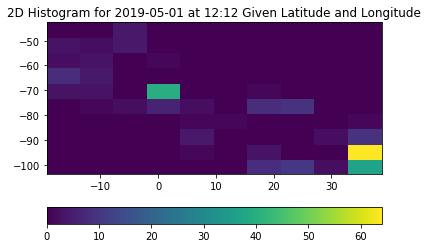

In [14]:
plt.title('2D Histogram for 2019-05-01 at 12:12 Given Latitude and Longitude')
plt.hist2d(g16glm.variables['flash_lat'],g16glm.variables['flash_lon'])
plt.colorbar(orientation = 'horizontal')

In [35]:
agg = xr.open_dataset('/glade/scratch/gwallach/goes16_nc/GLM_grids_32/glm_grid_s20190501T000000_e20190502T000000.nc')
print(agg)

<xarray.Dataset>
Dimensions:           (time: 72, x: 65, y: 129)
Coordinates:
  * y                 (y) float64 -1.024e+03 -1.008e+03 ... 1.008e+03 1.024e+03
  * x                 (x) float64 -512.0 -496.0 -480.0 ... 480.0 496.0 512.0
    lon               (y, x) float64 ...
    lat               (y, x) float64 ...
  * time              (time) datetime64[ns] 2019-05-01T00:20:00 ... 2019-05-02
Data variables:
    lightning_counts  (time, y, x) int32 ...


Text(0.5, 1.0, 'Visualization of GLM Grid Data for 05-01-2019')

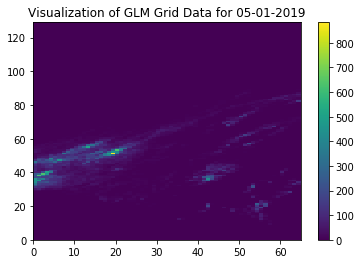

In [42]:
#plt.pcolormesh(agg['lightning_counts'][1,:,:])
#sum up everything and put it in one graph
plt.pcolormesh(agg['lightning_counts'].sum(dim='time'))
plt.colorbar()
plt.title('Visualization of GLM Grid Data for 05-01-2019')

<xarray.Dataset>
Dimensions:       (band: 4, patch: 3550, x: 32, y: 32)
Coordinates:
  * patch         (patch) int64 0 1 2 3 4 5 6 ... 3544 3545 3546 3547 3548 3549
  * y             (y) int64 0 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30 31
  * x             (x) int64 0 1 2 3 4 5 6 7 8 9 ... 23 24 25 26 27 28 29 30 31
  * band          (band) int64 8 9 10 14
Data variables:
    abi           (patch, band, y, x) float32 ...
    time          (patch) datetime64[ns] ...
    lon           (patch, y, x) float32 ...
    lat           (patch, y, x) float32 ...
    flash_counts  (patch) int32 ...


ValueError: too many values to unpack (expected 2)

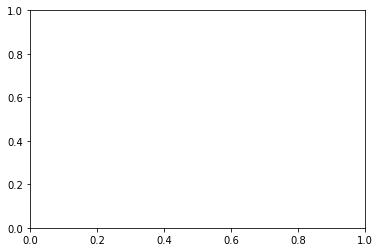

In [10]:
agg2 = xr.open_dataset('/glade/scratch/gwallach/goes16_nc/ABI_patches_32/abi_patches_20190501T000000.nc')
print(agg2)
index0 = np.argwhere(agg2.flash_counts.values < 33).flatten()
index0 = index0[205]
#print(index0)
index3 = np.argwhere(agg2.flash_counts.values > 100).flatten()
index3 = index3[3]
#vmin = agg2['abi'][index0,:,:,:].min()
#vmax = agg2['abi'][index0,:,:,:].max()
plt.pcolormesh(agg2['abi'][index0,:,:,:])

plt.suptitle('Example Patch with Low and High Lightning Activity', fontsize=20)

In [ ]:
agg2['abi'][index3,:,:,:].plot()

In [ ]:
plt.pcolormesh()

In [26]:
len(agg.variables['x'])
len(agg.variables['y'])
print(len(agg.variables['lightning_counts']))
for i in agg.variables['lightning_counts']:
    print(i.shape)

72
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)
(129, 65)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): y(129), x(65), time(72)
    variables(dimensions): float64 y(y), float64 x(x), float64 lon(y,x), float64 lat(y,x), int64 time(time), int32 lightning_counts(time,y,x)
    groups: 


ValueError: not enough values to unpack (expected 2, got 1)

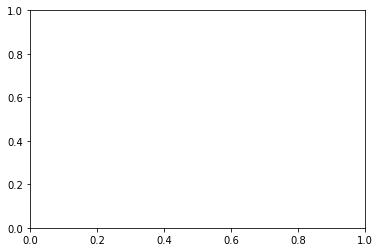